In [24]:
import pandas as pd

# File paths
purchase_behaviour_file = "path_to_purchase_behaviour.csv"
transaction_data_file = "path_to_transaction_data.csv"

# Load datasets
purchase_behaviour = pd.read_csv(purchase_behaviour_file)
transaction_data = pd.read_csv(transaction_data_file)

In [25]:
# Display basic info and first few rows
purchase_behaviour.info()
purchase_behaviour.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [26]:
transaction_data.info()
transaction_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [27]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], origin="1899-12-30", unit="D")

# Check for negative/zero values in TOT_SALES or PROD_QTY (anomalies)
anomalies = transaction_data[(transaction_data["TOT_SALES"] <= 0) | (transaction_data["PROD_QTY"] <= 0)]

# Remove anomalies (negative/zero sales or quantity)
transaction_data = transaction_data[(transaction_data["TOT_SALES"] > 0) & (transaction_data["PROD_QTY"] > 0)]

# Check for duplicates in transaction data
duplicates = transaction_data.duplicated().sum()

# Remove duplicate transactions
transaction_data.drop_duplicates(inplace=True)

# Standardize product names (remove extra spaces)
transaction_data["PROD_NAME"] = transaction_data["PROD_NAME"].str.replace(r'\s+', ' ', regex=True).str.strip()

# Display results
print(duplicates)
print(anomalies.shape)


1
(0, 8)


In [28]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [29]:
# Merge datasets on loyalty card number
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

# Clean product names (remove variations like "Chips Salted 150g" → "Chips Salted")
merged_data['PROD_NAME'] = merged_data['PROD_NAME'].str.replace(r'\d+g$', '', regex=True).str.strip()

# Convert DATE to datetime and extract features
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])
merged_data['MONTH'] = merged_data['DATE'].dt.month
merged_data['DAY_OF_WEEK'] = merged_data['DATE'].dt.day_name()

# Check for missing values
print("Missing Values:")
print(merged_data.isnull().sum())

# Drop rows with missing customer data (if minimal)
merged_data.dropna(subset=['LIFESTAGE', 'PREMIUM_CUSTOMER'], inplace=True)

Missing Values:
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
MONTH               0
DAY_OF_WEEK         0
dtype: int64


In [30]:
merged_data.info()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_NAME         264835 non-null  object        
 6   PROD_QTY          264835 non-null  int64         
 7   TOT_SALES         264835 non-null  float64       
 8   LIFESTAGE         264835 non-null  object        
 9   PREMIUM_CUSTOMER  264835 non-null  object        
 10  MONTH             264835 non-null  int32         
 11  DAY_OF_WEEK       264835 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 23.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,DAY_OF_WEEK
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,10,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,5,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,5,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,MIDAGE SINGLES/COUPLES,Budget,8,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,MIDAGE SINGLES/COUPLES,Budget,8,Saturday


C:\Users\SHANMUKH\AppData\Local\Temp\ipykernel_9496\1658473236.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


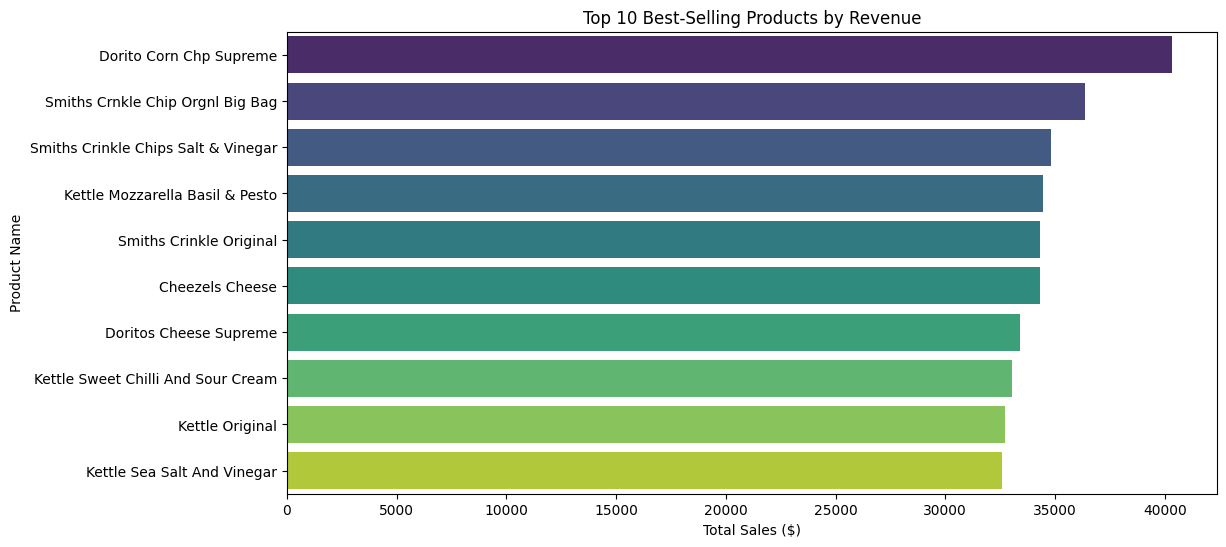

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product name and sum total sales
top_products = merged_data.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(10)

# Plot top 10 best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products by Revenue")
plt.show()

In [32]:
# Top 3 most profitable products by total sales
top_profitable_products = merged_data.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(3)
print("Top 3 Most Profitable Products:\n", top_profitable_products)

Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp Supreme                40352.0
Smiths Crnkle Chip Orgnl Big Bag       36367.6
Smiths Crinkle Chips Salt & Vinegar    34804.2
Name: TOT_SALES, dtype: float64


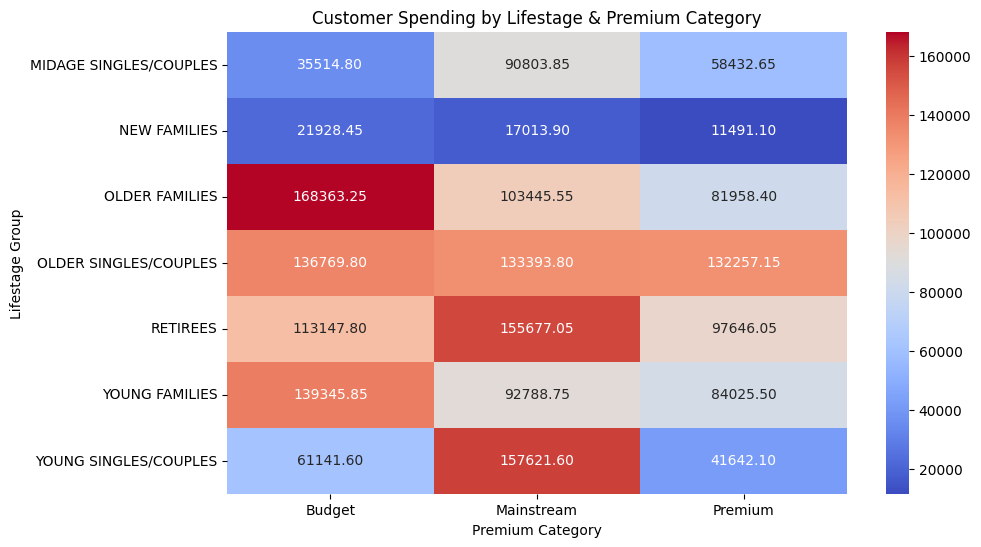

In [33]:
# Group by LIFESTAGE & PREMIUM_CUSTOMER to get total sales
customer_spending = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customer_spending, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Customer Spending by Lifestage & Premium Category")
plt.xlabel("Premium Category")
plt.ylabel("Lifestage Group")
plt.show()



Lifestage Distribution of Loyal Customers:
LIFESTAGE
OLDER SINGLES/COUPLES     0.225327
OLDER FAMILIES            0.208936
RETIREES                  0.189207
YOUNG FAMILIES            0.184370
MIDAGE SINGLES/COUPLES    0.091886
YOUNG SINGLES/COUPLES     0.080502
NEW FAMILIES              0.019772
Name: proportion, dtype: float64

Premium Customer Distribution:
PREMIUM_CUSTOMER
Mainstream    0.371394
Budget        0.359625
Premium       0.268981
Name: proportion, dtype: float64


C:\Users\SHANMUKH\AppData\Local\Temp\ipykernel_9496\1815408513.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lifestage_dist.values, y=lifestage_dist.index, ax=axes[0], palette='Blues_d')
C:\Users\SHANMUKH\AppData\Local\Temp\ipykernel_9496\1815408513.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premium_dist.values, y=premium_dist.index, ax=axes[1], palette='Reds_d')


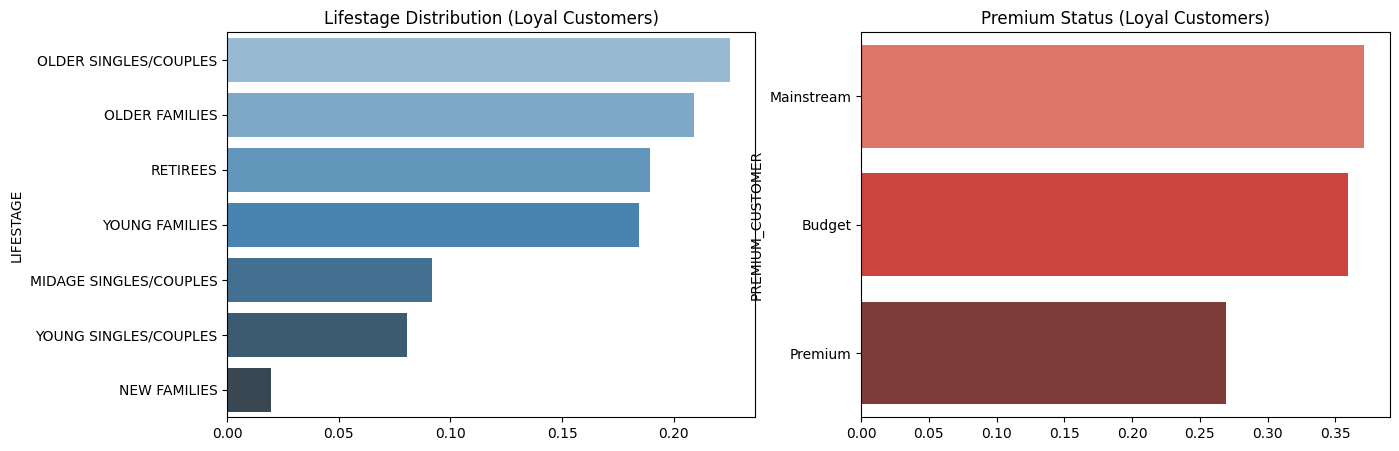

In [34]:
# Calculate purchase frequency and total spending per customer
customer_metrics = merged_data.groupby('LYLTY_CARD_NBR').agg(
    total_transactions=('TXN_ID', 'count'),
    total_spent=('TOT_SALES', 'sum')
).reset_index()

# Segment customers into loyalty tiers
customer_metrics['loyalty_tier'] = pd.qcut(
    customer_metrics['total_transactions'],
    q=[0, 0.33, 0.66, 1],
    labels=['Low', 'Medium', 'High']
)

# Merge loyalty tiers with customer demographics
loyal_customers = pd.merge(
    customer_metrics,
    purchase_behaviour,
    on='LYLTY_CARD_NBR',
    how='left'
).drop_duplicates()

# Filter high-loyalty customers
high_loyalty = loyal_customers[loyal_customers['loyalty_tier'] == 'High']

# Analyze demographics
lifestage_dist = high_loyalty['LIFESTAGE'].value_counts(normalize=True)
premium_dist = high_loyalty['PREMIUM_CUSTOMER'].value_counts(normalize=True)

print("\nLifestage Distribution of Loyal Customers:")
print(lifestage_dist)
print("\nPremium Customer Distribution:")
print(premium_dist)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=lifestage_dist.values, y=lifestage_dist.index, ax=axes[0], palette='Blues_d')
sns.barplot(x=premium_dist.values, y=premium_dist.index, ax=axes[1], palette='Reds_d')
axes[0].set_title('Lifestage Distribution (Loyal Customers)')
axes[1].set_title('Premium Status (Loyal Customers)')
plt.show()

In [35]:
import datetime

# Define today's date as the max transaction date in our dataset
today_date = merged_data["DATE"].max()

# Compute Recency (days since last purchase), Frequency, and Monetary Value
rfm = merged_data.groupby("LYLTY_CARD_NBR").agg({
    "DATE": lambda x: (today_date - x.max()).days,  # Recency
    "TXN_ID": "count",  # Frequency (number of transactions)
    "TOT_SALES": "sum"   # Monetary Value (total spending)
})

# Rename columns
rfm.columns = ["Recency", "Frequency", "Monetary"]

# Display top customers based on monetary value
rfm_sorted = rfm.sort_values(by="Monetary", ascending=False)
print("Top 10 Most Loyal Customers:\n", rfm_sorted.head(10))


Top 10 Most Loyal Customers:
                 Recency  Frequency  Monetary
LYLTY_CARD_NBR                              
226000               41          2   1300.00
230078               10         17    138.60
63197                 0         15    132.80
259009               59         15    127.20
162039                9         18    126.80
58361                 5         14    124.80
230154               41         14    124.40
94185                36         16    122.80
130090               29         14    122.65
179228                2         16    120.80


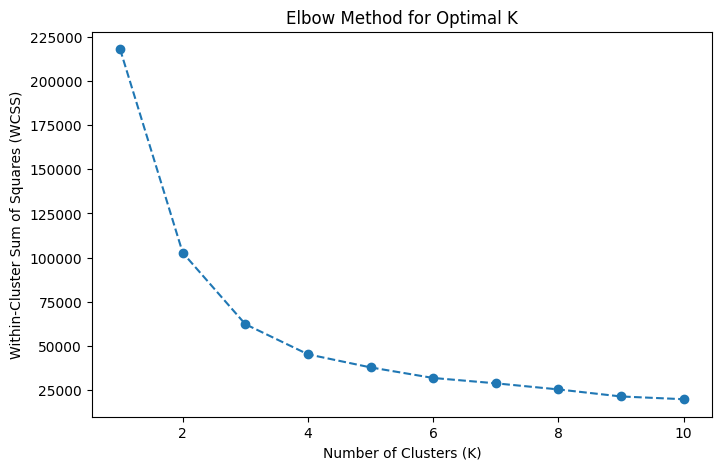

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Try different values of K (1 to 10)
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


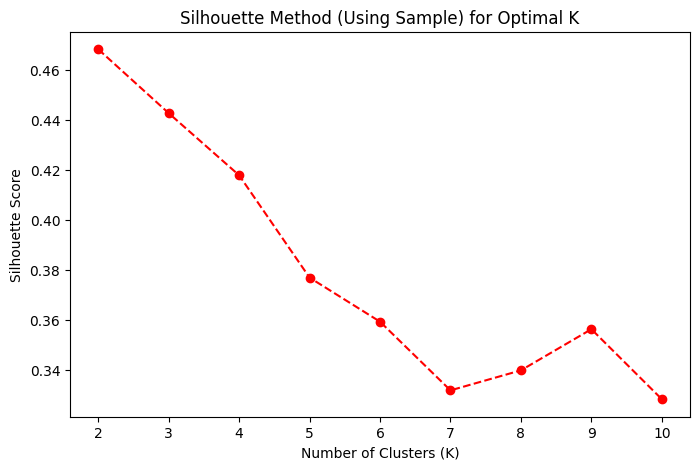

In [39]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

silhouette_scores = []
sample_size = 5000  # Choose a reasonable sample size based on available RAM

for k in range(2, 11):  # K must be at least 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)

    # Take a random sample for Silhouette Score calculation
    if len(rfm_scaled) > sample_size:
        X_sample, labels_sample = resample(rfm_scaled, cluster_labels, n_samples=sample_size, random_state=42)
    else:
        X_sample, labels_sample = rfm_scaled, cluster_labels  # Use full data if small

    score = silhouette_score(X_sample, labels_sample)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="--", color="red")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method (Using Sample) for Optimal K")
plt.show()


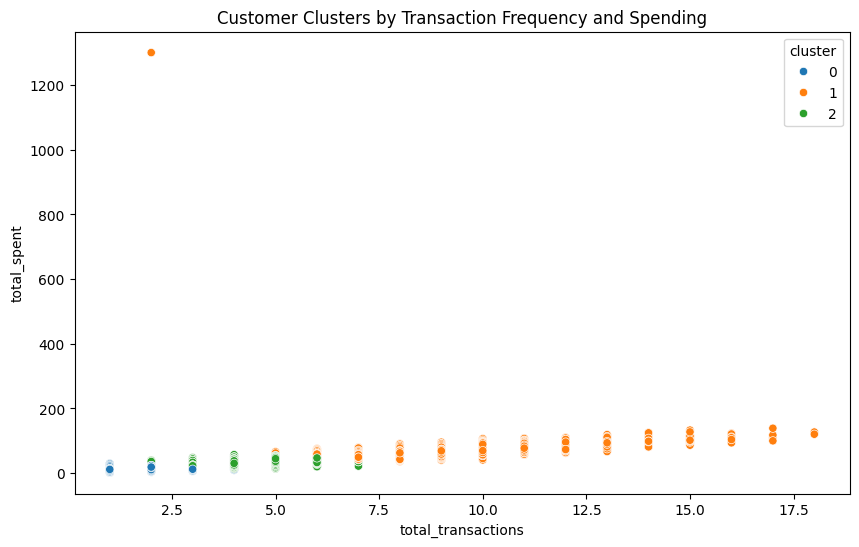


Cluster Summary:
                     LIFESTAGE PREMIUM_CUSTOMER  total_transactions  \
cluster                                                               
0        YOUNG SINGLES/COUPLES       Mainstream            1.568663   
1               OLDER FAMILIES           Budget            8.099159   
2        OLDER SINGLES/COUPLES       Mainstream            4.373629   

         total_spent  
cluster               
0          10.156588  
1          60.314956  
2          33.279870  


In [40]:
# Prepare data for clustering
X = loyal_customers[['total_transactions', 'total_spent']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
loyal_customers['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_transactions',
    y='total_spent',
    hue='cluster',
    data=loyal_customers,
    palette='tab10'
)
plt.title('Customer Clusters by Transaction Frequency and Spending')
plt.show()

# Analyze cluster demographics
cluster_summary = loyal_customers.groupby('cluster').agg({
    'LIFESTAGE': lambda x: x.mode()[0],
    'PREMIUM_CUSTOMER': lambda x: x.mode()[0],
    'total_transactions': 'mean',
    'total_spent': 'mean'
})
print("\nCluster Summary:")
print(cluster_summary)

            Recency  Frequency   Monetary
Cluster                                  
0        241.935318   1.501491  10.160067
1         45.372750   7.046937  52.594862
2         67.977297   2.608185  18.762544
Average Spending per Cluster:
 Cluster
0    6.766650
1    7.463507
2    7.193717
Name: TOT_SALES, dtype: float64


C:\Users\SHANMUKH\AppData\Local\Temp\ipykernel_9496\987245584.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_spending.index, y=cluster_spending.values, palette="coolwarm")


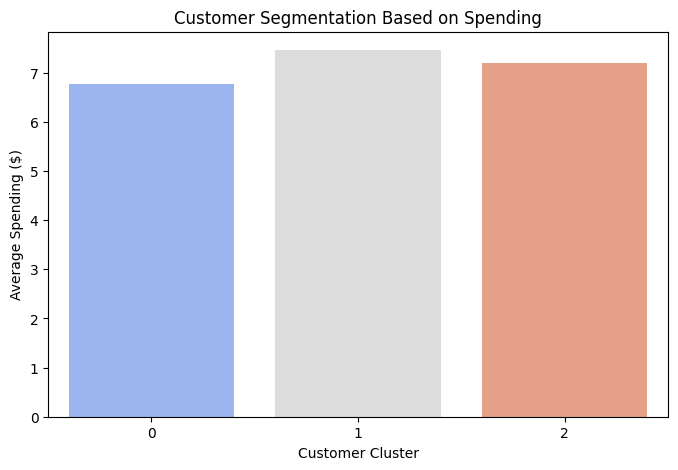

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the RFM values for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Analyze the clusters
print(rfm.groupby("Cluster").mean())

# Merge clusters back into the main dataset
merged_data = merged_data.merge(rfm["Cluster"], left_on="LYLTY_CARD_NBR", right_index=True)

# Analyze spending by cluster
cluster_spending = merged_data.groupby("Cluster")["TOT_SALES"].mean()
print("Average Spending per Cluster:\n", cluster_spending)

# Plot spending behavior per cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_spending.index, y=cluster_spending.values, palette="coolwarm")
plt.xlabel("Customer Cluster")
plt.ylabel("Average Spending ($)")
plt.title("Customer Segmentation Based on Spending")
plt.show()


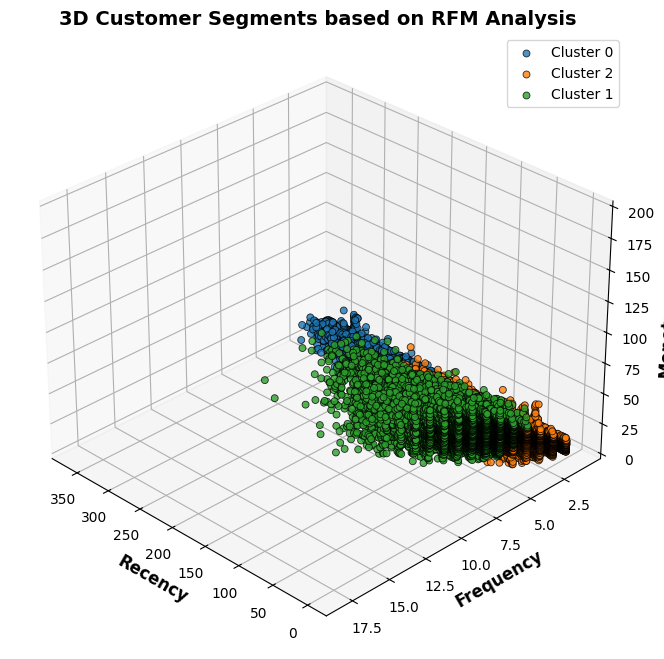

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Set figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = sns.color_palette('tab10', len(rfm['Cluster'].unique()))
cluster_colors = {cluster: colors[i] for i, cluster in enumerate(rfm['Cluster'].unique())}

# Scatter plot with borders around points
for cluster in rfm['Cluster'].unique():
    subset = rfm[rfm['Cluster'] == cluster]
    ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'], 
               color=cluster_colors[cluster], edgecolors='black', linewidth=0.6, 
               label=f'Cluster {cluster}', alpha=0.8, s=25)  # Reduced marker size

# Set labels
ax.set_xlabel('Recency', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_zlabel('Monetary', fontsize=12, fontweight='bold')
ax.set_title('3D Customer Segments based on RFM Analysis', fontsize=14, fontweight='bold')

# Limit the z-axis (Monetary) to remove outliers
ax.set_zlim(0, 200)

# Adjust view for better perspective
ax.view_init(elev=30, azim=135)

# Show legend
ax.legend()

# Show plot
plt.show()
